# OpenEO

## Overview

This document serves as a quick reference guide of how to access OpenEO's APIs, using Python.
This notebook requires some libraries which aren't included in the Jupyter environment, please be sure to follow the readme to create an environment and install such libraries in a correct way.

***Steps***:
1. Preparation
2. Browse Collections
3. Operate on Datacubes
4. Visualization

## Preparation
Firstly we need to install the `openeo` library and import it:

In [1]:
import openeo
import json

In [2]:
BASE_URL="https://openeo.dataspace.copernicus.eu/openeo/1.2"
conn=openeo.connect(BASE_URL)
conn.authenticate_oidc()

Authenticated using refresh token.


<Connection to 'https://openeo.dataspace.copernicus.eu/openeo/1.2' with OidcBearerAuth>

If the openeo library throws an error between two different sessions while authenticating then execute this snippet as a workaround and try again:

In [ ]:
import os
os.remove("/home/jovyan/.local/share/openeo-python-client/refresh-tokens.json")

## Browse Collections

The OpenEO client is very easy to use and automatically takes care of what we need to do. For example this is what we need to do to get and browse all available collections:

In [3]:
collections = conn.list_collections()
j=json.dumps(collections)

In [4]:
#visual list view
collections

[{'description': 'Sentinel 3 imagery captured by OLCI sensor',
  'extent': {'spatial': {'bbox': [[-180.0, -85.0, 180.0, 85.0]]},
   'temporal': {'interval': [['2016-04-17T11:33:13Z', None]]}},
  'id': 'SENTINEL3_OLCI_L1B',
  'license': 'proprietary',
  'links': [{'href': 'https://sh.dataspace.copernicus.eu/api/v1/catalog/1.0.0/',
    'rel': 'root',
    'type': 'application/json'},
   {'href': 'https://sh.dataspace.copernicus.eu/api/v1/catalog/1.0.0/collections/sentinel-3-olci',
    'rel': 'self',
    'type': 'application/json'},
   {'href': 'https://sh.dataspace.copernicus.eu/api/v1/catalog/1.0.0/collections',
    'rel': 'parent',
    'type': 'application/json'},
   {'href': 'https://sh.dataspace.copernicus.eu/api/v1/catalog/1.0.0/collections/sentinel-3-olci/queryables',
    'rel': 'http://www.opengis.net/def/rel/ogc/1.0/queryables',
    'type': 'application/schema+json'},
   {'href': 'https://sh.dataspace.copernicus.eu/api/v1/catalog/1.0.0/collections/sentinel-3-olci/items',
    'rel': 'items',
    'type': 'application/geo+json'}],
  'providers': [],
  'stac_extensions': ['https://stac-extensions.github.io/scientific/v1.0.0/schema.json',
   'https://stac-extensions.github.io/sat/v1.0.0/schema.json',
   'https://stac-extensions.github.io/eo/v1.0.0/schema.json'],
  'stac_version': '1.0.0',
  'title': 'Sentinel 3 OLCI'},
 {'description': 'Sentinel 3 imagery captured by SLSTR sensor',
  'extent': {'spatial': {'bbox': [[-180.0, -85.0, 180.0, 85.0]]},
   'temporal': {'interval': [['2016-04-17T11:33:13Z', None]]}},
  'id': 'SENTINEL3_SLSTR',
  'license': 'proprietary',
  'links': [{'href': 'https://sh.dataspace.copernicus.eu/api/v1/catalog/1.0.0/',
    'rel': 'root',
    'type': 'application/json'},
   {'href': 'https://sh.dataspace.copernicus.eu/api/v1/catalog/1.0.0/collections/sentinel-3-slstr',
    'rel': 'self',
    'type': 'application/json'},
   {'href': 'https://sh.dataspace.copernicus.eu/api/v1/catalog/1.0.0/collections',
    'rel': 'parent',
    'type': 'application/json'},
   {'href': 'https://sh.dataspace.copernicus.eu/api/v1/catalog/1.0.0/collections/sentinel-3-slstr/queryables',
    'rel': 'http://www.opengis.net/def/rel/ogc/1.0/queryables',
    'type': 'application/schema+json'},
   {'href': 'https://sh.dataspace.copernicus.eu/api/v1/catalog/1.0.0/collections/sentinel-3-slstr/items',
    'rel': 'items',
    'type': 'application/geo+json'}],
  'providers': [],
  'stac_extensions': ['https://stac-extensions.github.io/scientific/v1.0.0/schema.json',
   'https://stac-extensions.github.io/sat/v1.0.0/schema.json',
   'https://stac-extensions.github.io/eo/v1.0.0/schema.json'],
  'stac_version': '1.0.0',
  'title': 'Sentinel 3 SLSTR'},
 {'description': 'Sentinel 5 Precursor imagery captured by TROPOMI sensor.\n\nThis dataset only supports loading one band at a time.',
  'extent': {'spatial': {'bbox': [[-180.0, -85.0, 180.0, 85.0]]},
   'temporal': {'interval': [['2018-04-30T00:18:50Z', None]]}},
  'id': 'SENTINEL_5P_L2',
  'license': 'proprietary',
  'links': [{'href': 'https://sh.dataspace.copernicus.eu/api/v1/catalog/1.0.0/',
    'rel': 'root',
    'type': 'application/json'},
   {'href': 'https://sh.dataspace.copernicus.eu/api/v1/catalog/1.0.0/collections/sentinel-5p-l2',
    'rel': 'self',
    'type': 'application/json'},
   {'href': 'https://sh.dataspace.copernicus.eu/api/v1/catalog/1.0.0/collections',
    'rel': 'parent',
    'type': 'application/json'},
   {'href': 'https://sh.dataspace.copernicus.eu/api/v1/catalog/1.0.0/collections/sentinel-5p-l2/queryables',
    'rel': 'http://www.opengis.net/def/rel/ogc/1.0/queryables',
    'type': 'application/schema+json'},
   {'href': 'https://sh.dataspace.copernicus.eu/api/v1/catalog/1.0.0/collections/sentinel-5p-l2/items',
    'rel': 'items',
    'type': 'application/geo+json'}],
  'providers': [],
  'stac_extensions': ['https://stac-extensions.github.io/scientific/v1.0.0/schema.json',
   'https://stac-extensions.github.io/sat/v1.0.0/schema.json',
   'https://docs.sentinel-hub.c

You can also get the collection lists by ID with the following command:

In [5]:
ids = conn.list_collection_ids()

In [6]:
#IDs only:
ids

['SENTINEL3_OLCI_L1B',
 'SENTINEL3_SLSTR',
 'SENTINEL_5P_L2',
 'SENTINEL2_L1C',
 'SENTINEL2_L2A',
 'SENTINEL1_GRD',
 'COPERNICUS_30',
 'LANDSAT8_L2']

## Operate on Datacubes

To retrieve the datacube we need an **AoI**, a **time interval** in days, a set of **bands** and obviously the **collection** from which we get it. In this example we are getting a datacube around the island of Pellworm.

In [11]:
pellworm = {"west": 8.5464, "south": 54.4473, "east": 9.0724, "north": 54.5685}
t = ["2021-03-05", "2021-03-10"]

dc = conn.load_collection(
    "SENTINEL2_L2A",
    spatial_extent = pellworm,
    temporal_extent = t,
    bands = ["B02", "B04", "B08", "SCL"]
)

print(dc.to_json())

{
  "process_graph": {
    "loadcollection1": {
      "process_id": "load_collection",
      "arguments": {
        "bands": [
          "B02",
          "B04",
          "B08",
          "SCL"
        ],
        "id": "SENTINEL2_L2A",
        "spatial_extent": {
          "west": 8.5464,
          "south": 54.4473,
          "east": 9.0724,
          "north": 54.5685
        },
        "temporal_extent": [
          "2021-03-05",
          "2021-03-10"
        ]
      },
      "result": true
    }
  }
}


To operate on the datacubes there are various different ways. The easier one is to use the various functions exposed by the datacubes which can be consulted at the [datacube documentation](https://open-eo.github.io/openeo-python-client/api.html#module-openeo.rest.datacube). For this example we will use NDVI.
Moreover after applying all processes you want to execute, we need to tell the back-end to export the datacube, for example as GeoTiff.

In [12]:
dc = dc.ndvi()
dc = dc.save_result(format="GTIFF")

It's important to note that what it has been done until now it's only a definition, to start the processor and get what we asked we need to create and run a job:

In [15]:
job = dc.create_job(title="my_ndvi")

In [16]:
job.start_and_wait()
job.get_results().download_files("output")

0:00:00 Job 'j-24030567e6e04161aa4d772abe3bd137': send 'start'
0:00:13 Job 'j-24030567e6e04161aa4d772abe3bd137': created (progress N/A)
0:00:20 Job 'j-24030567e6e04161aa4d772abe3bd137': created (progress N/A)
0:00:27 Job 'j-24030567e6e04161aa4d772abe3bd137': created (progress N/A)
0:00:35 Job 'j-24030567e6e04161aa4d772abe3bd137': running (progress N/A)
0:00:45 Job 'j-24030567e6e04161aa4d772abe3bd137': running (progress N/A)
0:00:58 Job 'j-24030567e6e04161aa4d772abe3bd137': running (progress N/A)
0:01:13 Job 'j-24030567e6e04161aa4d772abe3bd137': running (progress N/A)
0:01:33 Job 'j-24030567e6e04161aa4d772abe3bd137': running (progress N/A)
0:01:57 Job 'j-24030567e6e04161aa4d772abe3bd137': running (progress N/A)
0:02:27 Job 'j-24030567e6e04161aa4d772abe3bd137': running (progress N/A)
0:03:05 Job 'j-24030567e6e04161aa4d772abe3bd137': finished (progress N/A)


[PosixPath('output/openEO_2021-03-05Z.tif'),
 PosixPath('output/openEO_2021-03-08Z.tif'),
 PosixPath('output/job-results.json')]

## Visualization

This section is out of the scope of openEO, through these libraries we can open and see the data we have just downloaded:

In [34]:
import rasterio
from rasterio.plot import show, show_hist
from rasterio.io import MemoryFile
import matplotlib.pyplot as plt

<Axes: title={'center': 'NDVI'}>

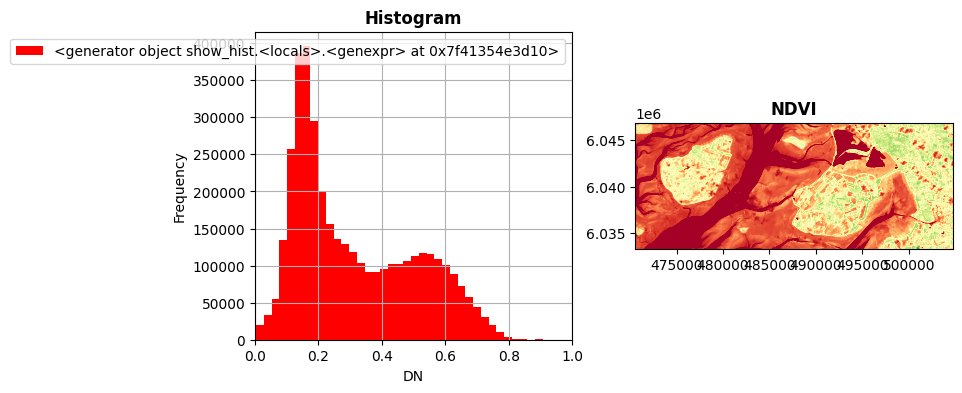

In [36]:
img = rasterio.open("output/openEO_2021-03-05Z.tif")

fig,(axr,axl) = plt.subplots(1,2, figsize=(9, 4))
axr.set_xlim(0,1)
show_hist(img,bins=255,ax=axr)
show(img,ax=axl,cmap=plt.cm.RdYlGn,title='NDVI',vmin=0,vmax=1)